In [301]:
# Import the libraries

import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style = 'white')     # White background and gridlines for seaborn plots
sns.set(style = 'whitegrid')

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)   # Ignore warnings

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


## Load the Data

In [221]:
df = pd.read_excel('creditcardmarketing.xlsx')

In [264]:
df

,customer_number,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [223]:
# Standardise headings

df.columns = [i.lower().replace(' ', '_') for i in df.columns]

In [224]:
df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


## Data Exploration & Cleaning

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   #_bank_accounts_open  18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   #_credit_cards_held   18000 non-null  int64  
 9   #_homes_owned         18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [226]:
# Create a new dataframe without the customer number as it is irrelevant for the model analysis

data = df.drop(['customer_number'], axis = 1)

In [227]:
data.isnull().any()

offer_accepted          False
reward                  False
mailer_type             False
income_level            False
#_bank_accounts_open    False
overdraft_protection    False
credit_rating           False
#_credit_cards_held     False
#_homes_owned           False
household_size          False
own_your_home           False
average_balance          True
q1_balance               True
q2_balance               True
q3_balance               True
q4_balance               True
dtype: bool

In [228]:
# Since there are only 24 rows with null values I decide to drop these

data.isnull().sum()

offer_accepted           0
reward                   0
mailer_type              0
income_level             0
#_bank_accounts_open     0
overdraft_protection     0
credit_rating            0
#_credit_cards_held      0
#_homes_owned            0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [229]:
data = data.dropna(axis = 0)

In [230]:
data.isnull().sum()

offer_accepted          0
reward                  0
mailer_type             0
income_level            0
#_bank_accounts_open    0
overdraft_protection    0
credit_rating           0
#_credit_cards_held     0
#_homes_owned           0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [231]:
data.shape

(17976, 16)

In [232]:
# Offer accepted is our target variable

data['offer_accepted'].value_counts()

No     16955
Yes     1021
Name: offer_accepted, dtype: int64

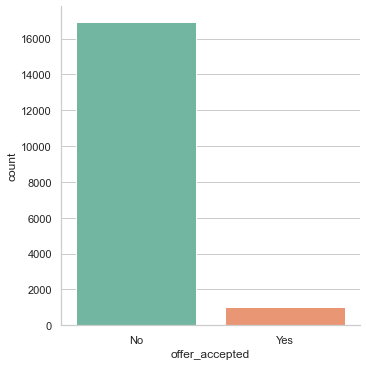

In [233]:
# The dataset is skewed - There are more customers that declined the offer than accepted
# We will have to balance the data before running the model

sns.catplot(x = 'offer_accepted', kind = "count", palette='Set2', data = data);

In [234]:
# Create a dataframe for categorical variables

df_cat = data.select_dtypes('object')

In [235]:
# Drop the target variable

df_cat = df_cat.drop(['offer_accepted'], axis = 1)

In [238]:
df_cat.head()

,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,Air Miles,Letter,High,No,High,No
1,Air Miles,Letter,Medium,No,Medium,Yes
2,Air Miles,Postcard,High,No,Medium,Yes
3,Air Miles,Letter,Medium,No,High,No
4,Air Miles,Letter,Medium,No,Medium,Yes


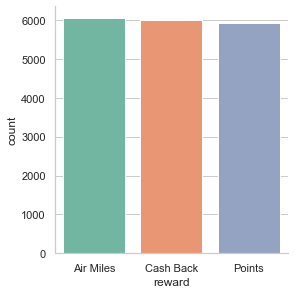

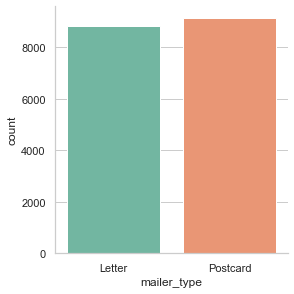

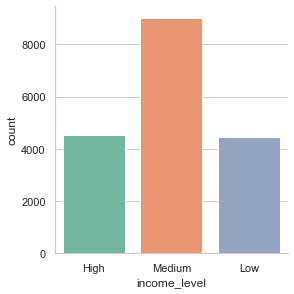

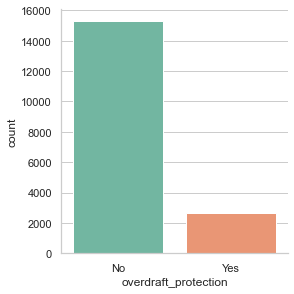

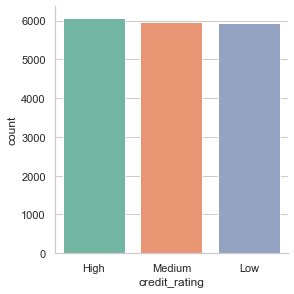

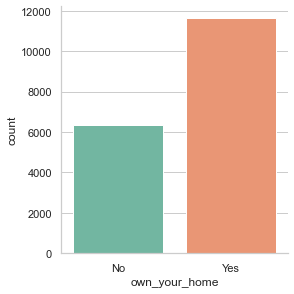

In [239]:
# Visualise categorical variables

for column in df_cat:
    sns.catplot(x = column, kind = "count", data = df_cat, palette = 'Set2', height = 4)

In [240]:
# Create dataframe for numerical data

df_num = data.select_dtypes(np.number)

In [241]:
df_num.head()

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


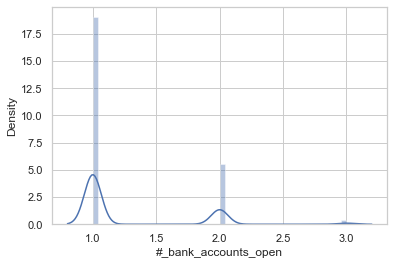

The skewness is:  1.577755085652093


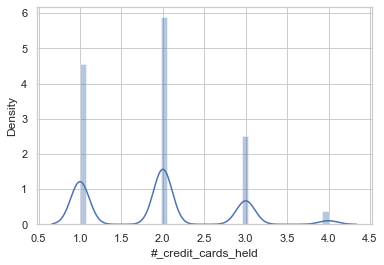

The skewness is:  0.5135425586045583


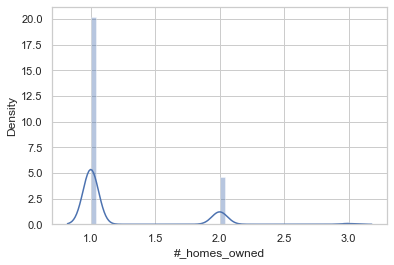

The skewness is:  1.861343969931656


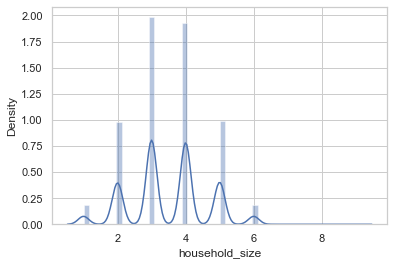

The skewness is:  0.016834709813279263


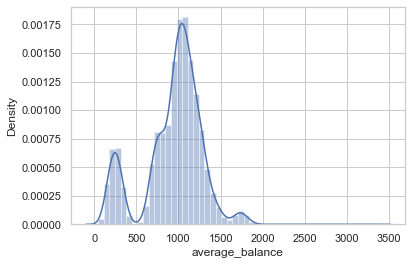

The skewness is:  -0.5723407970872233


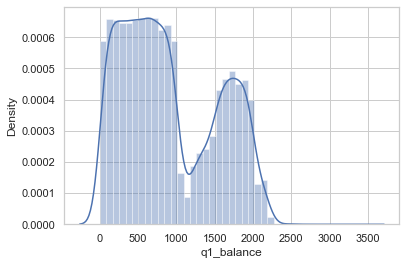

The skewness is:  0.4109111821855018


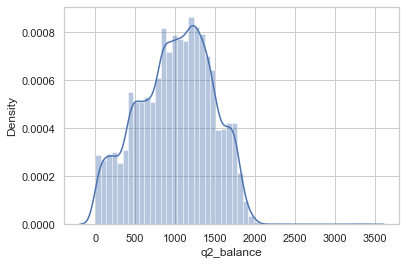

The skewness is:  -0.18299270673139537


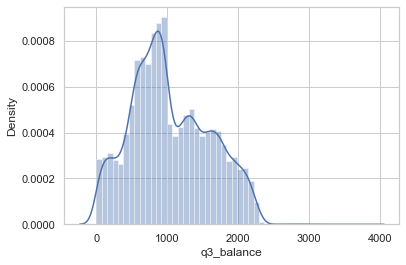

The skewness is:  0.2896287584691995


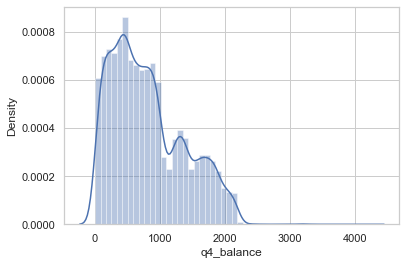

The skewness is:  0.6411829058277461


In [242]:
# Explore the distribution and skewness of numeric variables 
# Skewness is a measure of how close the distibution is to a normal distribution
# A normal distibution has a skewness of zero

for column in df_num:
    sns.distplot(df_num[column])
    skew = df[column].skew()
    plt.show()
    print('The skewness is: ', skew)

### Checking for outliers

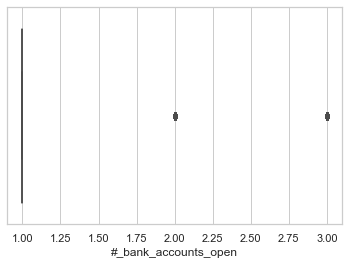

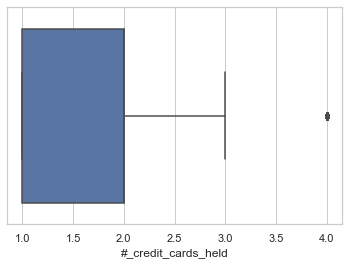

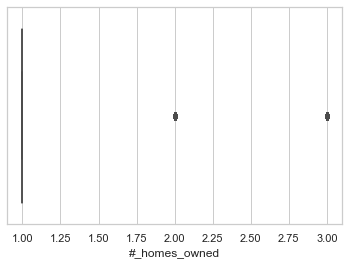

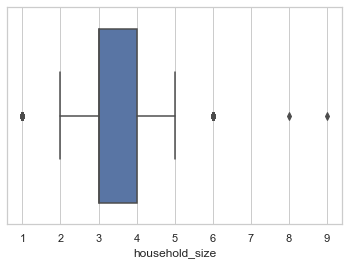

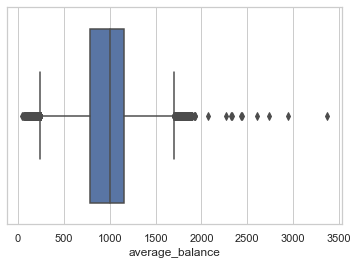

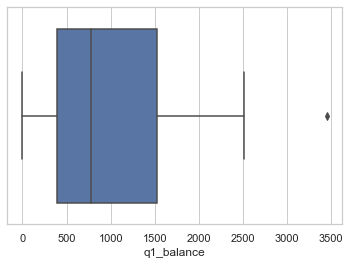

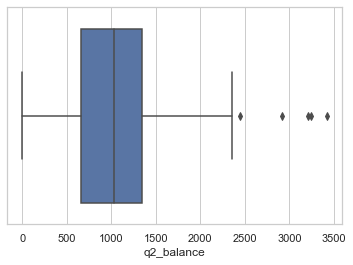

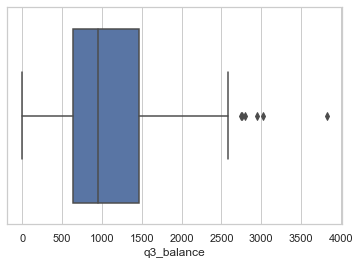

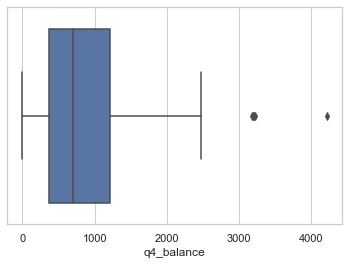

In [243]:
# I decide to not remove any outliers at this stage since nothing seems out of the ordinary

for column in df_num:
    sns.boxplot(df_num[column])
    plt.show()

### Checking for correlation

In [244]:
corr_matrix = df_num.corr()
corr_matrix

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
#_bank_accounts_open,1.000000,-0.001633,0.004762,0.008622,-0.003909,-0.002814,-0.007956,0.000190,-0.000356
#_credit_cards_held,-0.001633,1.000000,-0.002390,-0.003040,-0.003469,-0.009446,-0.007373,-0.007623,0.015362
#_homes_owned,0.004762,-0.002390,1.000000,0.005227,0.017967,0.013143,0.009758,0.007775,0.014775
household_size,0.008622,-0.003040,0.005227,1.000000,-0.003582,-0.005080,-0.008766,0.003633,0.000232
average_balance,-0.003909,-0.003469,0.017967,-0.003582,1.000000,0.481507,0.800285,0.752741,0.572380
q1_balance,-0.002814,-0.009446,0.013143,-0.005080,0.481507,1.000000,0.483134,-0.060961,-0.237283
q2_balance,-0.007956,-0.007373,0.009758,-0.008766,0.800285,0.483134,1.000000,0.487710,0.168955
q3_balance,0.000190,-0.007623,0.007775,0.003633,0.752741,-0.060961,0.487710,1.000000,0.565298
q4_balance,-0.000356,0.015362,0.014775,0.000232,0.572380,-0.237283,0.168955,0.565298,1.000000


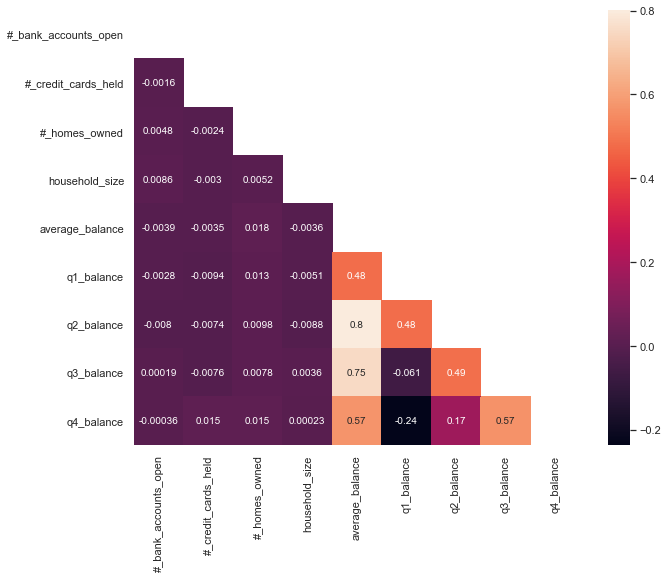

In [245]:
# Checking for correlations and multicorrilineraity using a heatmap

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corr_matrix, mask = mask, annot = True)
plt.show()

In [246]:
# Average balance have high multicorrilinearity with q1, q2, q3 and q4 balances so I decide to exclude these columns

df_num = df_num.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'], axis = 1)

In [259]:
df_num.head()

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance
0,1,2,1,4,1160.75
1,1,2,2,5,147.25
2,2,2,1,2,276.50
3,2,1,1,4,1219.00
4,1,2,1,6,1211.00


## Preprocessing

In [248]:
df_cat.shape

(17976, 6)

In [249]:
df_cat.head()

,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,Air Miles,Letter,High,No,High,No
1,Air Miles,Letter,Medium,No,Medium,Yes
2,Air Miles,Postcard,High,No,Medium,Yes
3,Air Miles,Letter,Medium,No,High,No
4,Air Miles,Letter,Medium,No,Medium,Yes


In [250]:
# Transforming categorical values into numerical values that can be read by the model with 'get dummies'

transformed_cat = pd.get_dummies(data = df_cat, drop_first = True)

In [252]:
transformed_cat.head()

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,1
2,0,0,1,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,1


In [265]:
# Concatenate the dataframes

final_df = pd.concat([transformed_cat, df_num], axis = 1)

In [272]:
final_df

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance
0,0,0,0,0,0,0,0,0,0,1,2,1,4,1160.75
1,0,0,0,0,1,0,0,1,1,1,2,2,5,147.25
2,0,0,1,0,0,0,0,1,1,2,2,1,2,276.50
3,0,0,0,0,1,0,0,0,0,2,1,1,4,1219.00
4,0,0,0,0,1,0,0,1,1,1,2,1,6,1211.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,1,0,1,1,1,1,5,167.50
17996,1,0,0,0,0,0,1,0,1,1,3,1,3,850.50
17997,1,0,0,0,0,0,1,0,0,1,2,1,4,1087.25
17998,1,0,0,0,1,0,0,1,1,1,4,2,2,1022.25


In [273]:
# Resetting the index

final_df = final_df.reset_index(drop = True)

In [274]:
final_df

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance
0,0,0,0,0,0,0,0,0,0,1,2,1,4,1160.75
1,0,0,0,0,1,0,0,1,1,1,2,2,5,147.25
2,0,0,1,0,0,0,0,1,1,2,2,1,2,276.50
3,0,0,0,0,1,0,0,0,0,2,1,1,4,1219.00
4,0,0,0,0,1,0,0,1,1,1,2,1,6,1211.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,1,0,0,0,0,0,1,0,1,1,1,1,5,167.50
17972,1,0,0,0,0,0,1,0,1,1,3,1,3,850.50
17973,1,0,0,0,0,0,1,0,0,1,2,1,4,1087.25
17974,1,0,0,0,1,0,0,1,1,1,4,2,2,1022.25


## Balance the dataset with SMOTE

In [275]:
# Define X and y

X = final_df
y = data['offer_accepted']

In [283]:
oversample = SMOTE()

# Fitting SMOTE onto the dataset

X_sm, y_sm = oversample.fit_sample(X, y)
y_sm = y_sm.to_numpy()
y_sm = pd.DataFrame(data = y_sm.flatten())
y_sm.value_counts()

Yes    16955
No     16955
dtype: int64

## Split balanced data into train and test split

In [285]:
# Test & train split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.25, random_state = 0)

In [286]:
X_train

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance
31409,0,0,1,0,1,0,0,1,1,1,1,1,2,998.516215
18155,1,0,1,0,1,0,1,0,0,1,2,1,1,1094.425688
12040,1,0,1,0,1,0,0,1,0,1,1,1,5,683.250000
1876,1,0,0,0,1,0,1,0,0,1,2,1,3,1447.500000
19907,0,1,1,0,1,0,0,0,0,1,3,1,4,1008.932533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,0,0,1,0,0,0,0,0,0,1,1,1,3,1026.512653
32103,0,0,0,0,0,0,0,0,0,1,2,1,4,1082.074134
30403,0,0,1,0,1,0,0,0,1,1,2,2,2,1112.349781
21243,0,0,1,0,1,0,1,0,1,1,1,1,2,1049.475400


In [287]:
X_test

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance
18838,0,0,1,1,0,0,0,0,1,1,1,1,3,1023.480251
6712,0,1,1,0,0,0,1,0,0,1,2,1,2,966.500000
29658,0,0,0,0,0,1,0,0,1,1,1,1,4,907.413928
24296,0,0,1,0,0,0,1,0,1,1,3,1,3,1065.651197
23623,0,0,0,0,0,0,1,0,1,2,2,1,2,1066.331807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343,0,1,0,0,0,0,1,0,1,1,3,2,2,1136.250000
5679,0,0,1,0,1,0,1,0,0,2,2,2,5,1305.750000
24337,0,1,0,1,0,0,1,0,1,2,1,1,3,1262.403281
17742,0,1,0,0,1,0,0,0,0,2,2,1,2,1156.750000


In [288]:
y_train

,0
31409,Yes
18155,Yes
12040,No
1876,No
19907,Yes
...,...
20757,Yes
32103,Yes
30403,Yes
21243,Yes


In [289]:
y_test

,0
18838,Yes
6712,No
29658,Yes
24296,Yes
23623,Yes
...,...
4343,No
5679,No
24337,Yes
17742,No


## Feature Scaling

In [295]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [303]:
X_train

array([[-0.49880781, -0.55936607,  0.97177287, ..., -0.37444959,
        -1.2304049 ,  0.1754493 ],
       [ 2.00478016, -0.55936607,  0.97177287, ..., -0.37444959,
        -2.17651537,  0.45111539],
       [ 2.00478016, -0.55936607,  0.97177287, ..., -0.37444959,
         1.60792649, -0.73069903],
       ...,
       [-0.49880781, -0.55936607,  0.97177287, ...,  2.43801411,
        -1.2304049 ,  0.5026334 ],
       [-0.49880781, -0.55936607,  0.97177287, ..., -0.37444959,
        -1.2304049 ,  0.32191783],
       [ 2.00478016, -0.55936607,  0.97177287, ..., -0.37444959,
         0.66181603,  0.19839655]])

In [304]:
X_test

array([[-0.49880781, -0.55936607,  0.97177287, ..., -0.37444959,
        -0.28429444,  0.24720173],
       [-0.49880781,  1.78773803,  0.97177287, ..., -0.37444959,
        -1.2304049 ,  0.08342726],
       [-0.49880781, -0.55936607, -1.02904705, ..., -0.37444959,
         0.66181603, -0.08639984],
       ...,
       [-0.49880781,  1.78773803, -1.02904705, ..., -0.37444959,
        -0.28429444,  0.93392201],
       [-0.49880781,  1.78773803, -1.02904705, ..., -0.37444959,
        -1.2304049 ,  0.63024994],
       [-0.49880781, -0.55936607,  0.97177287, ..., -0.37444959,
        -2.17651537, -0.13798405]])

## Defining the model

In [298]:
classifier = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr')
classifier.fit(X_train, y_train)

/Users/siriamanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(multi_class='ovr', random_state=0)

In [299]:
y_pred = classifier.predict(X_test)
y_pred

array(['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

The accuracy of the model: 0.81 
The Kappa of the model is: 0.63

              precision    recall  f1-score   support

         Yes       0.81      0.83      0.82      4270
          No       0.82      0.80      0.81      4208

    accuracy                           0.81      8478
   macro avg       0.82      0.81      0.81      8478
weighted avg       0.82      0.81      0.81      8478



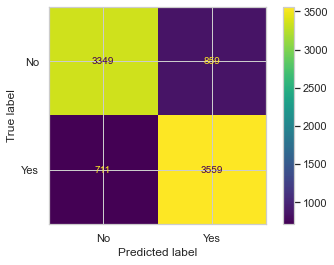

In [302]:
print("The accuracy of the model: %4.2f " % accuracy_score(y_test, y_pred))
print("The Kappa of the model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print()
print(classification_report(y_test, y_pred, labels=["Yes","No"], zero_division = 1))
plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()